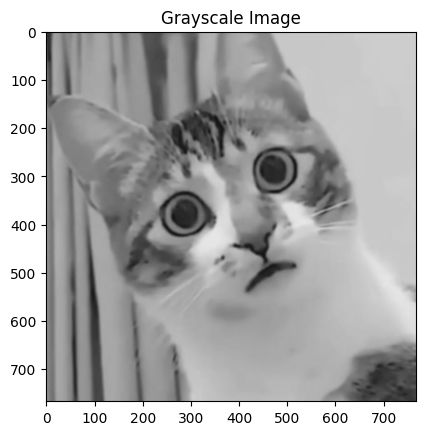

In [10]:
# Mengimport library yang digunakan
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load gambar dari local drive dengan cv2.imread
kucinghuh = cv2.imread("huh.jpg")

# Mendapatkan resolusi dan type dari gambar
kucinghuh_height = kucinghuh.shape[0]     # Mengambil tinggi gambar dalam piksel, dan menyimpannya dalam variabel "kucinghuh_height" 
kucinghuh_width = kucinghuh.shape[1]      # Mengambil lebar gambar dalam piksel, dan menyimpannya dalam variabel "kucinghuh_width"
kucinghuh_channel = kucinghuh.shape[2]    # Mengambil jumlah channel warna dalam gambar, dan menyimpannya dalam variabel "kucinghuh_channel".
kucinghuh_type = kucinghuh.dtype          # Mengambil tipe data gambar (misalnya, uint8, float32), dan menyimpannya dalam variabel "kucinghuh_type".

# PERCOBAAN PERTAMA : Mengubah gambar menjadi grayscale
kucinghuh_grayscale = np.zeros(kucinghuh.shape, dtype=np.uint8) # Variabel gambar grayscale dengan resolusi dan mengeset type gambar menjadi uint8

for y in range(0, kucinghuh_height):      # Perulangan for variabel y (tinggi) dalam rentang 0 hingga "kucinghuh_height"
    for x in range(0, kucinghuh_width):   # Perulangan for variabel x (lebar) dalam rentang 0 hingga "kucinghuh_width"
        red = kucinghuh[y][x][0]          # Menampung channel warna Red dari gambar ke dalam variabel "red" 
        green = kucinghuh[y][x][1]        # Menampung channel warna Green dari gambar ke dalam variabel "green"  
        blue = kucinghuh[y][x][2]         # Menampung channel warna Blue dari gambar ke dalam variabel "blue"   
        gray = (int(red) + int(green) + int(blue)) / 3 # Menjumlahkan ketiga nilai channel RGB dan membagi dengan 3 lalu disimpan pada variabel "gray"
        kucinghuh_grayscale[y][x] = (gray, gray, gray) # Mengisi channel warna y dan x dengan nilai "gray" di ketiga channel sehingga menjadi 1 channel warna grayscale
        
plt.imshow(kucinghuh_grayscale)     # Menampilkan gambar yang sudah diubah menjadi grayscale
plt.title("Grayscale Image")        # Memberikan judul gambar "Grayscale Image"
plt.show()                          # Menampilkan gambar

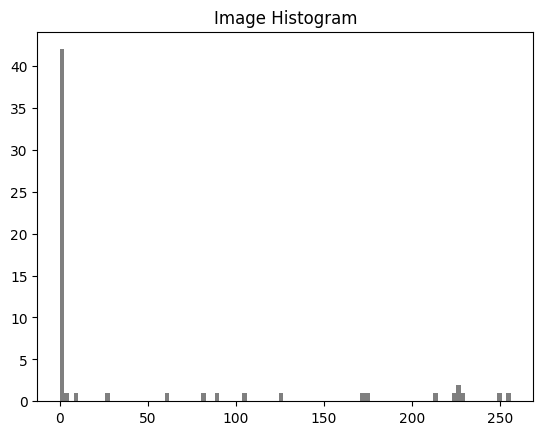

In [11]:
# PERCOBAAN KEDUA : Menampilkan Histogram Gambar Grayscale
hg = np.zeros((256))    # Membuat variabel untuk menyimpan data gambar

# Mengisi setiap nilai dalam array hg dengan 0
for x in range(0, 256): 
    hg[x] = 0

# Menghitung nilai dari gambar
for y in range(0, kucinghuh_height):        # Perulangan for variabel y (tinggi) dalam rentang 0 hingga "kucinghuh_height"
    for x in range(0, kucinghuh_width):     # Perulangan for variabel x (lebar) dalam rentang 0 hingga "kucinghuh_width"    
        gray = kucinghuh_grayscale[y][x][0] # Variabel gray menampung nilai "x" dan "y" gambar
        hg[gray] += 1                       # Untuk Array hg setiap gray akan bertambah 1

# Menampilkan Histogram
# plt.figure(figsize=(20, 6))
# plt.plot(hg, color="black", linewidth=2.0)
# plt.show()

bins = np.linspace(0, 256, 100)     # Menghasilkan array NumPy dengan panjang 100 yang berisi nilai-nilai teratur antara 0 hingga 256.
plt.hist(hg, bins, color="black", alpha=0.5) # Membuat histogram dari data "hg" dengan menggunakan "bins" sebagai batas interval atau bins pada histogram. color dan alpha untuk mengatur warna dan transparansi histogram
plt.title("Image Histogram")        # Memberikan judul gambar "Image Histogram" 
plt.show()                          # Menampilkan gambar

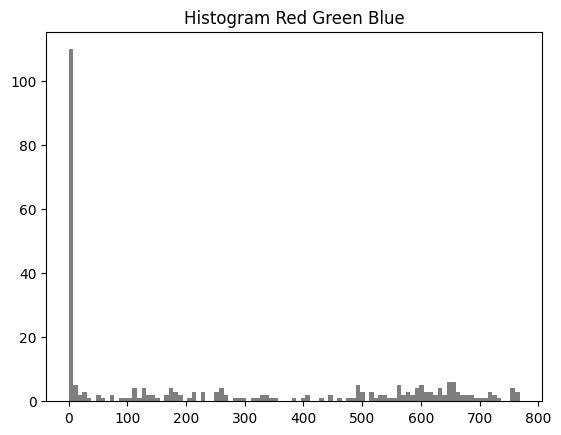

In [9]:
# PERCOBAAN KETIGA : Menampilkan Histogram Gambar RGB

# Membuat variabel untuk menyimpan data gambar
hgr = np.zeros((256))   # Membuat array NumPy yang berisi 256 elemen dengan nilai awal 0. Array ini akan digunakan untuk menyimpan jumlah kemunculan nilai intensitas warna merah (red) pada gambar.
hgg = np.zeros((256))   # Membuat array NumPy yang berisi 256 elemen dengan nilai awal 0. Array ini akan digunakan untuk menyimpan jumlah kemunculan nilai intensitas warna hijau (green) pada gambar.
hgb = np.zeros((256))   # Membuat array NumPy yang berisi 256 elemen dengan nilai awal 0. Array ini akan digunakan untuk menyimpan jumlah kemunculan nilai intensitas warna biru (blue) pada gambar.
hgrgb = np.zeros((768)) # Membuat array NumPy yang berisi 768 elemen dengan nilai awal 0. Array ini akan digunakan untuk menyimpan jumlah kemunculan dari setiap nilai intensitas warna pada gambar, yaitu untuk nilai red, green, dan blue.

# Mengisi setiap nilai dalam array hg dengan 0
for x in range(0, 256): 
    hgr[x] = 0          # Mengisi setiap nilai dalam array "hgr" dengan 0.
    hgg[x] = 0          # Mengisi setiap nilai dalam array "hgg" dengan 0.
    hgb[x] = 0          # Mengisi setiap nilai dalam array "hgb" dengan 0.
    
for x in range(0, 768):
    hgrgb[x] = 0        # Mengisi setiap nilai dalam array hgrgb dengan 0.

# Menghitung nilai dari gambar
# th = int(256/64)
temp = [0]                                  # Membuat list temp yang berisi 1 elemen dengan nilai 0.
for y in range(0, kucinghuh.shape[0]):      # Looping sebanyak tinggi (height) dari citra atau gambar.
    for x in range(0, kucinghuh.shape[1]):  # Looping sebanyak lebar (width) dari citra atau gambar.
        red = int(kucinghuh[y][x][0])       # Mengambil nilai intensitas warna merah (red) dari piksel pada posisi (y, x) pada citra atau gambar, dan mengkonversi nilai tersebut ke tipe data integer.
        green = int(kucinghuh[y][x][1])     # Mengambil nilai intensitas warna hijau (green) dari piksel pada posisi (y, x) pada citra atau gambar, dan mengkonversi nilai tersebut ke tipe data integer.
        blue = int(kucinghuh[y][x][2])      # Mengambil nilai intensitas warna biru (blue) dari piksel pada posisi (y, x) pada citra atau gambar, dan mengkonversi nilai tersebut ke tipe data integer.
        green = green + 256                 # Menambahkan nilai 256 pada green sehingga warna green diwakilkan nilai rentang dari 256-511
        blue = blue + 512                   # Menambahkan nilai 512 pada blue sehingga warna blue diwakilkan nilai rentang dari 512-768
#         temp.append(green)
        hgrgb[red] += 1                     # Menghitung frekuensi kemunculan nilai pixel warna merah dan ditambahkan ke dalam array "hgrgb"
        hgrgb[green] += 1                   # Menghitung frekuensi kemunculan nilai pixel warna hijau dan ditambahkan ke dalam array "hgrgb"
        hgrgb[blue] += 1                    # Menghitung frekuensi kemunculan nilai pixel warna biru dan ditambahkan ke dalam array "hgrgb"

binsrgb = np.linspace(0, 768, 100)          # Menghasilkan array NumPy dengan panjang 100 yang berisi nilai-nilai teratur antara 0 hingga 768.
plt.hist(hgrgb, binsrgb, color="black", alpha=0.5) # Membuat histogram dari data "hgrgb" dengan menggunakan "bins" sebagai batas interval atau bins pada histogram. color dan alpha untuk mengatur warna dan transparansi histogram
# plt.plot(hgrgb)
plt.title("Histogram Red Green Blue")       # Memberikan judul gambar "Histogram Red Green Blue" 
plt.show()                                  # Menampilkan gambar

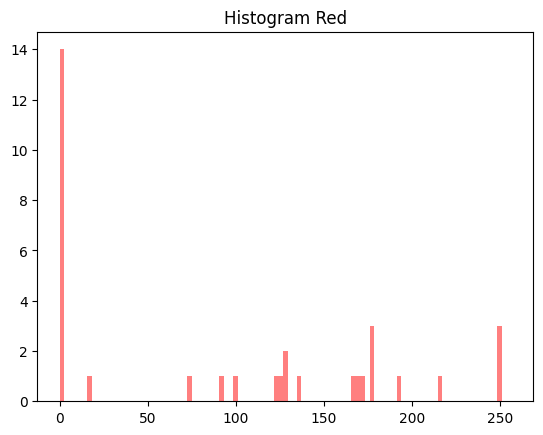

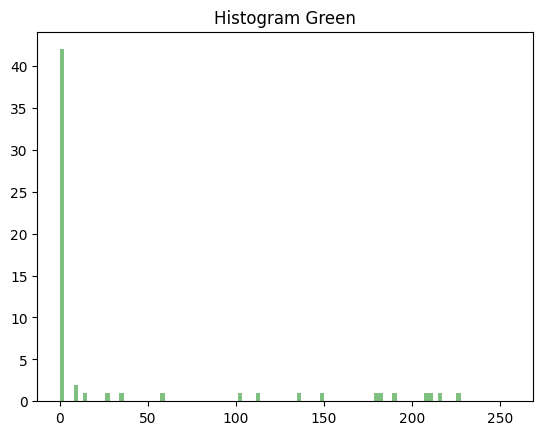

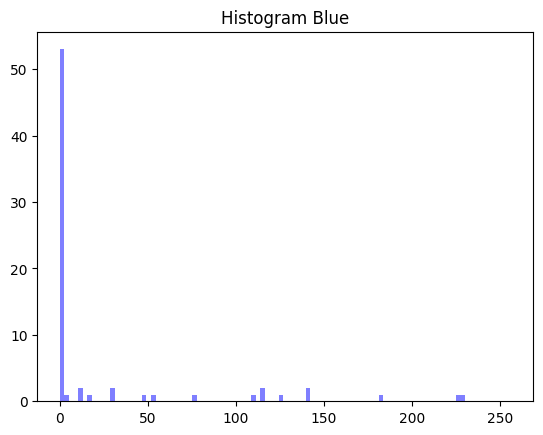

In [17]:
# PERCOBAAN KEEMPAT : Menampilkan Histogram RGB sesuai warna channel

for y in range(0, kucinghuh_height):        # Looping sebanyak tinggi (height) dari citra atau gambar.
    for x in range(0, kucinghuh_width):     # Looping sebanyak lebar (width) dari citra atau gambar.
        red = kucinghuh[y][x][0]            # Mengambil nilai intensitas warna merah (red) dari piksel pada posisi (y, x) pada citra atau gambar, dan mengkonversi nilai tersebut ke tipe data integer.
        green = kucinghuh[y][x][1]          # Mengambil nilai intensitas warna hijau (green) dari piksel pada posisi (y, x) pada citra atau gambar, dan mengkonversi nilai tersebut ke tipe data integer.
        blue = kucinghuh[y][x][2]           # Mengambil nilai intensitas warna biru (blue) dari piksel pada posisi (y, x) pada citra atau gambar, dan mengkonversi nilai tersebut ke tipe data integer.
        hgr[red] += 1                       # Menghitung frekuensi kemunculan nilai pixel warna merah dan ditambahkan ke dalam array "hgrgb"
        hgg[green] += 1                     # Menghitung frekuensi kemunculan nilai pixel warna hijau dan ditambahkan ke dalam array "hgrgb"
        hgb[blue] += 1                      # Menghitung frekuensi kemunculan nilai pixel warna biru dan ditambahkan ke dalam array "hgrgb"

bins = np.linspace(0, 256, 100)                 # Menghasilkan array NumPy dengan panjang 100 yang berisi nilai-nilai teratur antara 0 hingga 256.
plt.hist(hgr, bins, color="red", alpha=0.5)     # Set color menjadi merah
plt.title("Histogram Red")                      # Memberikan judul "Histogram Red"
plt.show()                                      # Menampilkan gambar

plt.hist(hgg, bins, color="green", alpha=0.5)   # Set color menjadi hijau
plt.title("Histogram Green")                    # Memberikan judul "Histogram Green"
plt.show()                                      # Menampilkan gambar

plt.hist(hgb, bins, color="blue", alpha=0.5)    # Set color menjadi biru
plt.title("Histogram Blue")                     # Memberikan judul "Histogram Blue"
plt.show()                                      # Menampilkan gambar

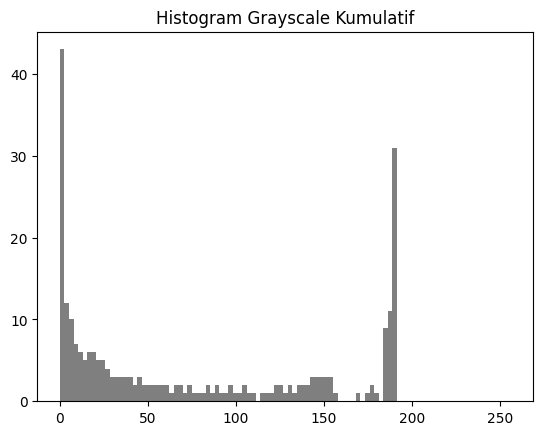

In [18]:
# PERCOBAAN KELIMA : Menampilkan Histogram Kumulatif

hgk = np.zeros((256))   # Membuat array 1 dimensi dengan 256 elemen, bernilai 0, yang akan digunakan untuk menyimpan data histogram grayscale.
c = np.zeros((256))     # Membuat array 1 dimensi dengan 256 elemen, bernilai 0, yang akan digunakan untuk menyimpan data nilai kumulatif histogram grayscale.

for x in range(0, 256): # Melakukan looping untuk setiap elemen dalam array hgk dan c.
    hgk[x] = 0          # Setiap elemen dalam array hgk diisi dengan nilai 0.
    c[x] = 0            # Setiap elemen dalam array c diisi dengan nilai 0.

for y in range(0, kucinghuh_height):        # Melakukan looping untuk setiap baris dalam gambar grayscale.
    for x in range(0, kucinghuh_width):     # Melakukan looping untuk setiap kolom dalam gambar grayscale.
        gray = kucinghuh_grayscale[y][x][0] # Mengambil nilai grayscale pada koordinat (x, y) dan menyimpannya ke dalam variabel gray.
        hgk[gray] += 1                      # Menambahkan nilai 1 ke elemen dalam array hgk pada indeks yang sama dengan nilai grayscale.
                
c[0] = hgk[0]               # Menyimpan nilai elemen pertama dalam array hgk ke dalam elemen pertama dalam array c.
for x in range(1, 256):     # Melakukan looping untuk setiap elemen dalam array c, dimulai dari indeks 1 hingga 255.
     c[x] = c[x-1] + hgk[x] # Setiap elemen dalam array c diisi dengan nilai elemen sebelumnya ditambah nilai elemen dalam array hgk pada indeks yang sama.

hmaxk = c[255]              # Menyimpan nilai elemen terakhir dalam array c ke dalam variabel hmaxk.

for x in range(0, 256):         # Melakukan iterasi untuk setiap elemen dalam array c.
    c[x] = 190 * c[x] / hmaxk   # Setiap elemen dalam array c dihitung nilainya dengan rumus (190 * nilai elemen) / hmaxk.

plt.hist(c, bins, color="black", alpha=0.5) # Menampilkan histogram dengan menggunakan data dalam array c dan menggunakan bin yang telah ditentukan sebelumnya.
plt.title("Histogram Grayscale Kumulatif")  # Memberikan judul pada histogram yang ditampilkan.
plt.show()                                  # Menampilkan histogram.

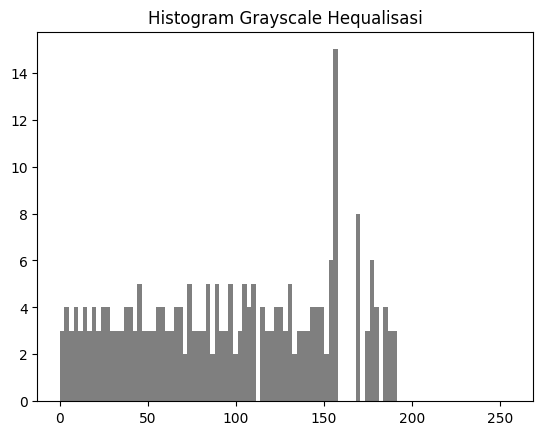

In [19]:
# PERCOBAAN KEENAM : Menampilkan Histogram Hequalisasi

hgh = np.zeros((256))   # Membuat array kosong dengan ukuran 256 dan menyimpannya dalam variabel hgh.
h = np.zeros((256))     # Membuat array kosong dengan ukuran 256 dan menyimpannya dalam variabel h.
c = np.zeros((256))     # Membuat array kosong dengan ukuran 256 dan menyimpannya dalam variabel c.

# Mengisi setiap nilai dalam array hgh, h, dan c dengan 0 menggunakan perulangan for.
for x in range(0, 256): 
    hgh[x] = 0
    h[x] = 0
    c[x] = 0

# Menggunakan perulangan for untuk menghitung histogram dari citra grayscale kucinghuh_grayscale dan menyimpannya dalam array hgh.
for y in range(0, kucinghuh_height):
    for x in range(0, kucinghuh_width):
        gray = kucinghuh_grayscale[y][x][0]
        hgh[gray] += 1
                
h[0] = hgh[0]       # Menghitung nilai kumulatif dari histogram hgh dan menyimpannya dalam array h.

# Menghitung nilai probabilitas dari setiap intensitas level dalam citra grayscale dan menyimpannya dalam array h.
for x in range(1, 256):
     h[x] = h[x-1] + hgh[x]

for x in range(0, 256):
     h[x] = h[x] / kucinghuh_height / kucinghuh_width

# Mengisi setiap nilai dalam array hgh dengan 0 menggunakan perulangan for.
for x in range(0, 256):
    hgh[x] = 0

# Menggunakan perulangan for untuk melakukan histogram equalization pada citra grayscale kucinghuh_grayscale dan menyimpannya dalam array hgh.  
for y in range(0, kucinghuh_height):
    for x in range(0, kucinghuh_width):
        gray = kucinghuh_grayscale[y][x][0]
        gray = h[gray] * 255
        hgh[int(gray)] += 1

# Menghitung nilai kumulatif dari histogram equalization hgh dan menyimpannya dalam array c.
c[0] = hgh[0]
for x in range(1, 256):
     c[x] = c[x-1] + hgh[x]

hmaxk = c[255]                  # Menghitung nilai hmaxk yaitu nilai maksimum dari nilai kumulatif histogram c pada index 255.

for x in range(0, 256):         # Menghitung nilai kumulatif histogram equalization c dan menyimpannya dalam array c.
    c[x] = 190 * c[x] / hmaxk   # Menormalisasi nilai dalam array c dengan memperbesar rentang nilai yang digunakan untuk menampilkannya pada grafik histogram. Nilai maksimum dalam array c dikalikan dengan 190 dan dibagi dengan hmaxk.

# Menampilkan histogram equalization citra grayscale pada grafik histogram.
plt.hist(c, bins, color="black", alpha=0.5)
plt.title("Histogram Grayscale Hequalisasi")
plt.show()